# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from sklearn import datasets

data = datasets.load_wine()

X_ = pd.DataFrame(data["data"], columns=data["feature_names"])
labels = pd.Series(data["target"])



In [11]:
from sklearn.preprocessing import StandardScaler as SS

# Your code here:

fit = SS().fit(np.array(X))
trans = fit.transform(np.array(X))

xy_scale = pd.DataFrame(trans)
X = xy_scale
len(X.columns)
X.columns = X_.columns

NameError: name 'X' is not defined

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [6]:
from sklearn.cluster import KMeans

KM = KMeans(n_clusters=8)

KM.fit(X)

labels = KM.labels_

from sklearn.metrics import silhouette_score as ss 

score = ss(X, labels, metric='euclidean')
score

NameError: name 'X' is not defined

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [95]:
KM = KMeans(n_clusters=5)

KM.fit(X)

labels = KM.labels_

ss(X,labels)

score = ss(X, labels, metric='euclidean')
score

0.19955177393500267

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [96]:
KM = KMeans(n_clusters=3)

KM.fit(X)

labels = KM.labels_

ss(X,labels)

score = ss(X, labels, metric='euclidean')
score

0.2848589191898987

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

NameError: name 'X' is not defined

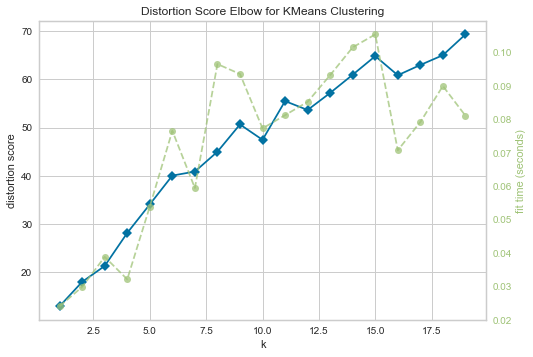

In [97]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20),metric='distortion')
visualizer.fit(X)
visualizer.poof()

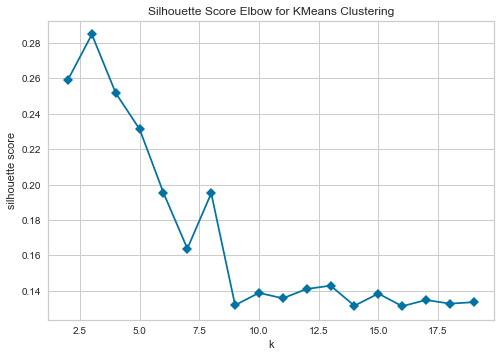

In [98]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette',timings=False)
visualizer.fit(X)
visualizer.poof()

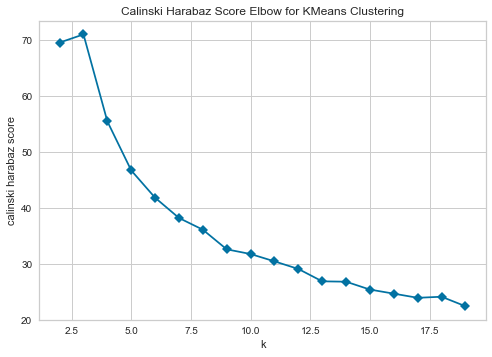

In [99]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20),metric='calinski_harabaz',timings=False)
visualizer.fit(X)
visualizer.poof()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

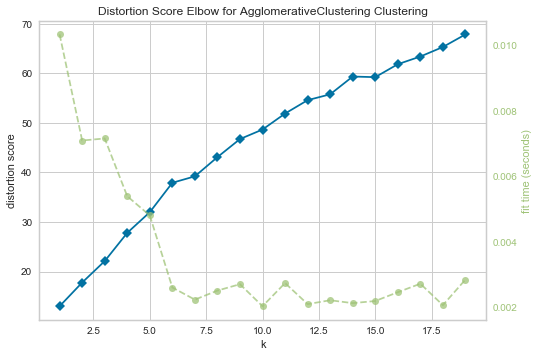

In [100]:
from sklearn.cluster import AgglomerativeClustering as AC 

model = AC()
visualizer = KElbowVisualizer(model, k=(1,20),metric='distortion')
visualizer.fit(X)
visualizer.poof()

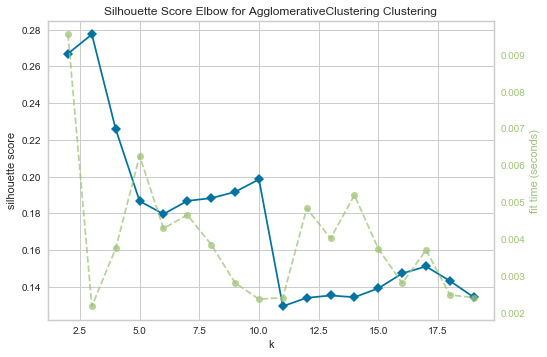

In [101]:
model = AC()
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette')
visualizer.fit(X)
visualizer.poof()

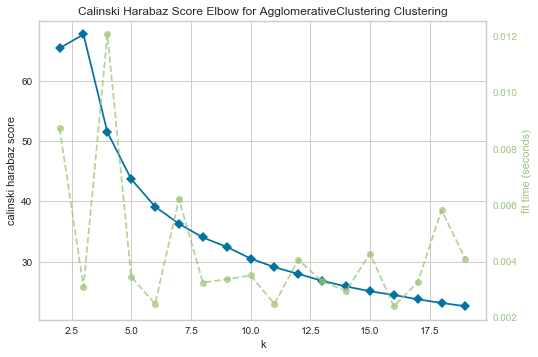

In [102]:
model = AC()
visualizer = KElbowVisualizer(model, k=(2,20),metric='calinski_harabaz')
visualizer.fit(X)
visualizer.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


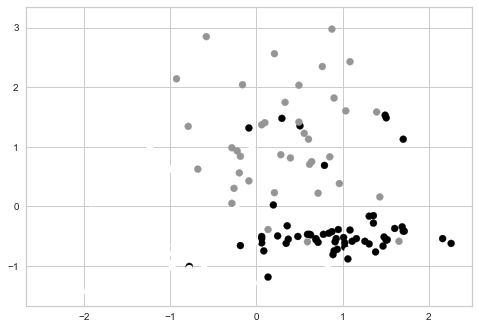

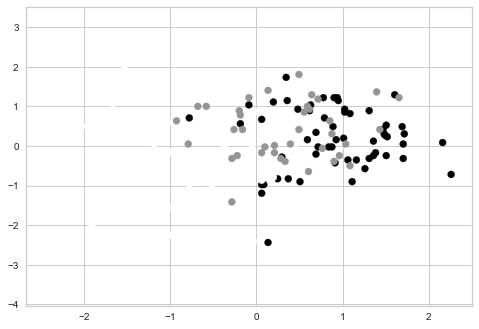

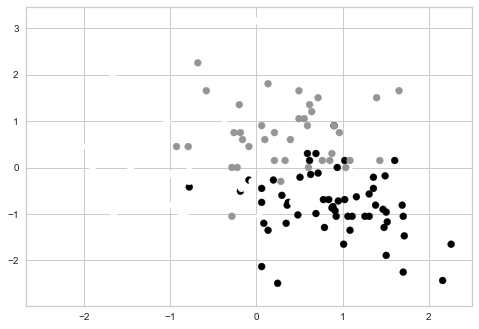

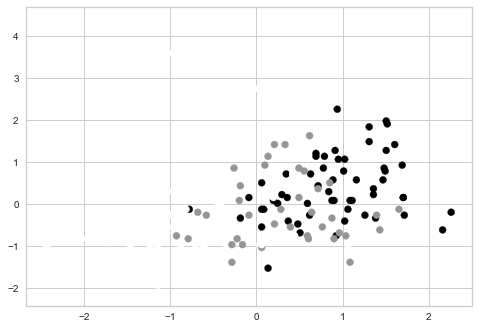

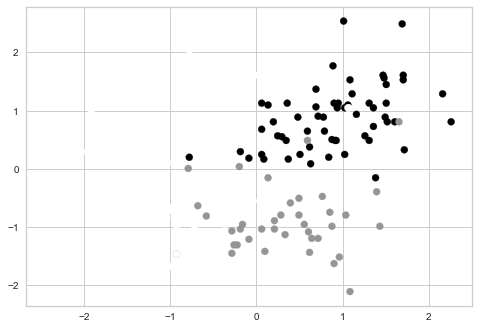

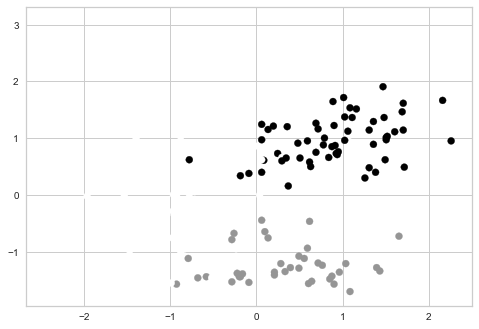

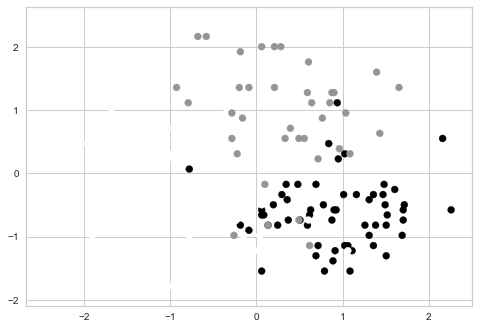

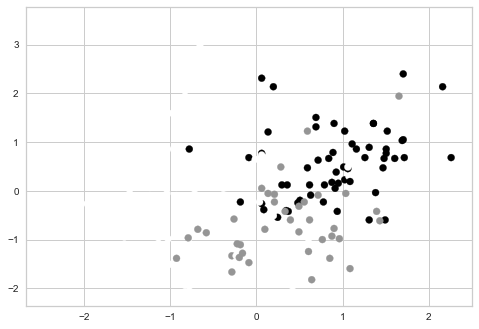

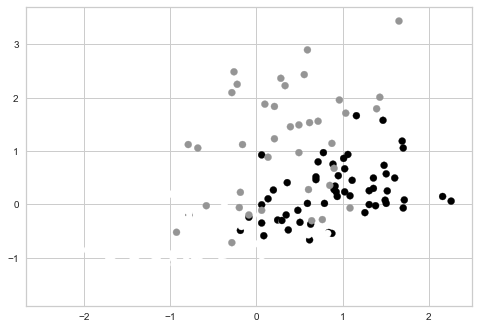

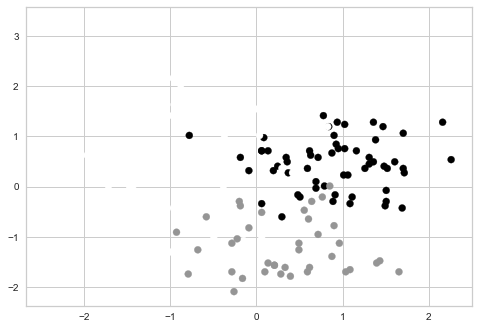

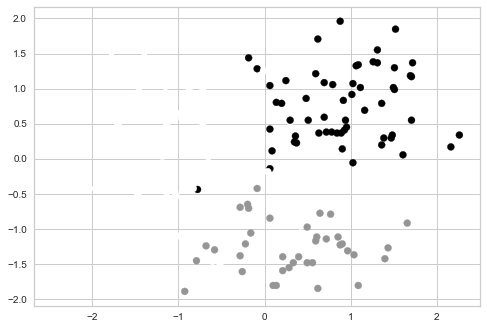

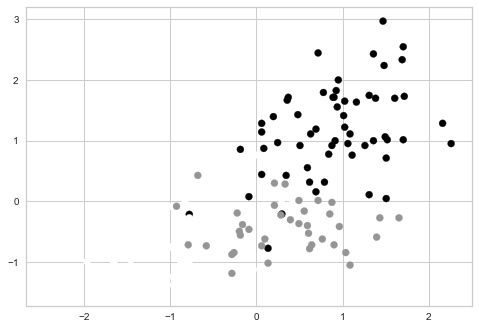

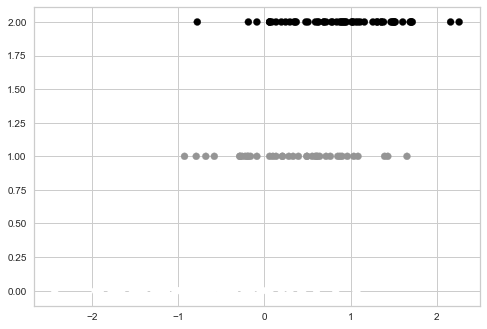

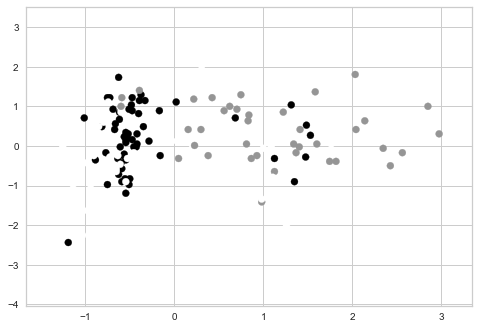

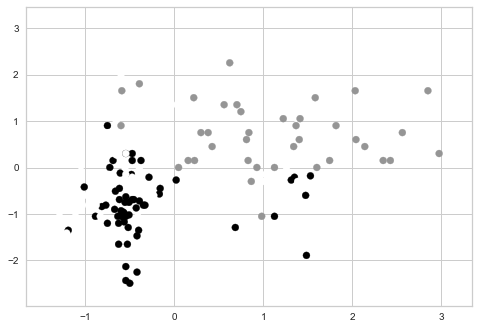

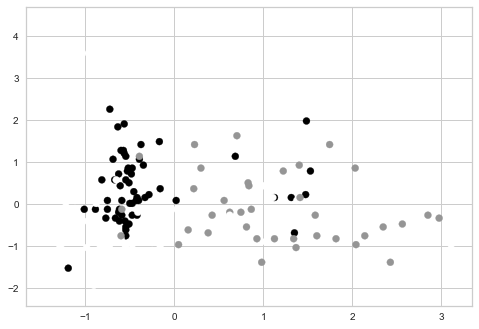

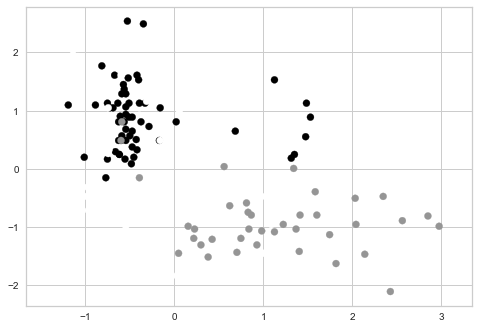

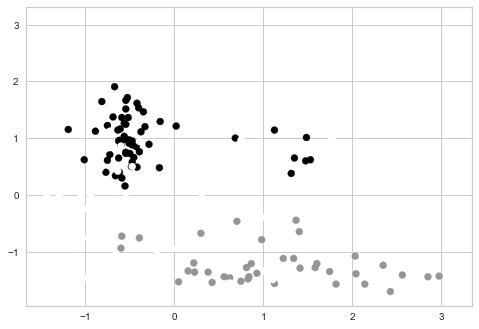

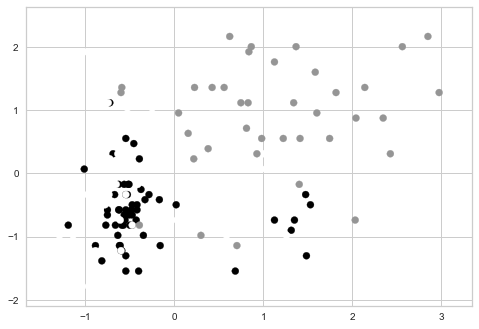

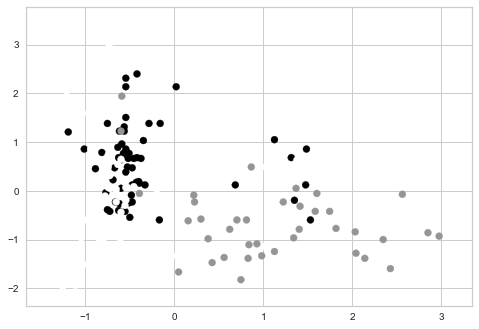

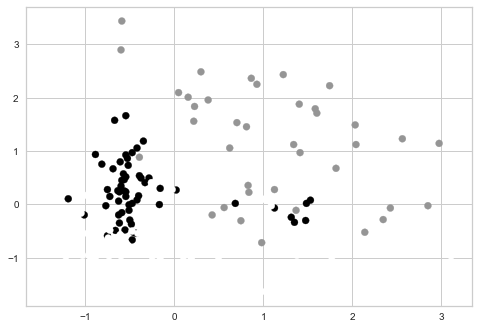

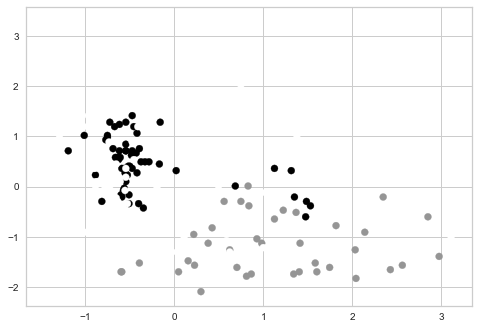

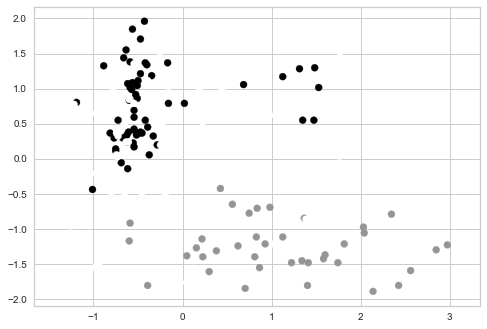

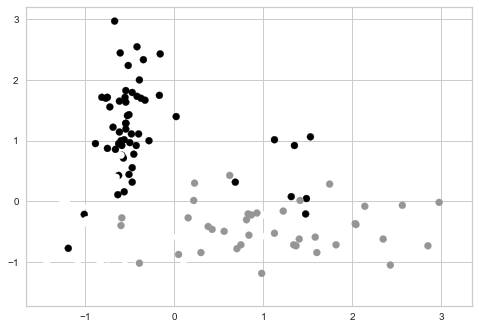

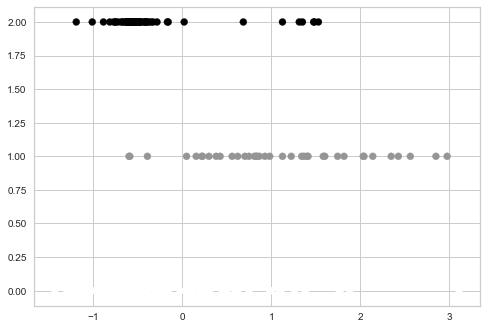

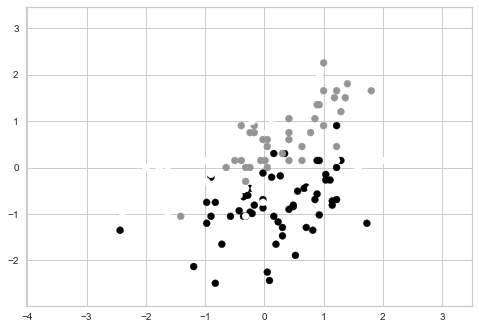

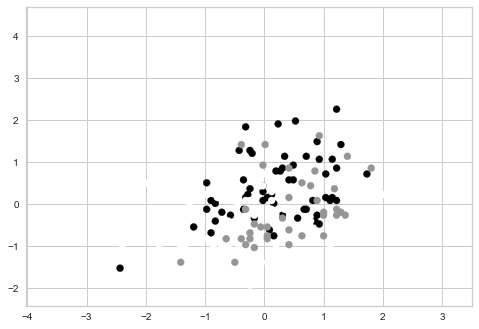

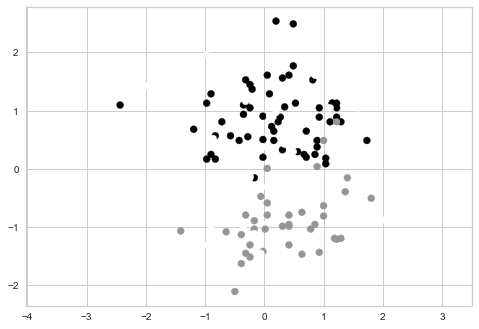

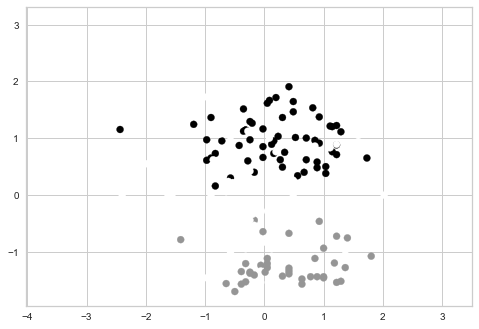

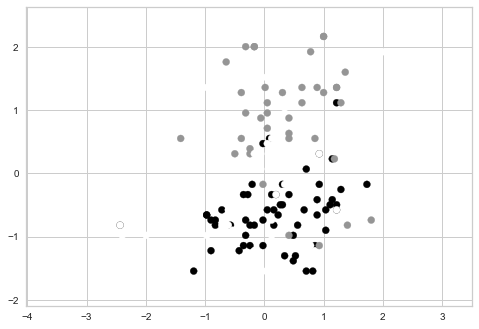

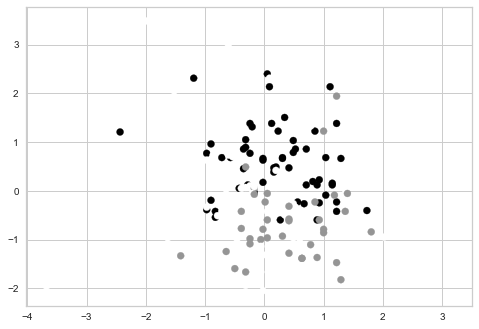

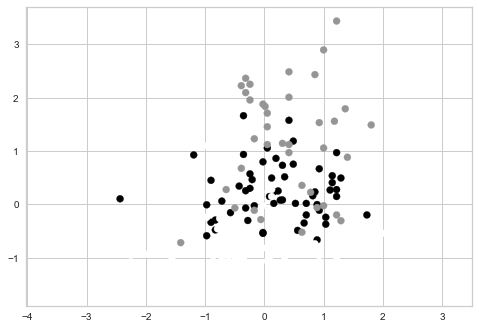

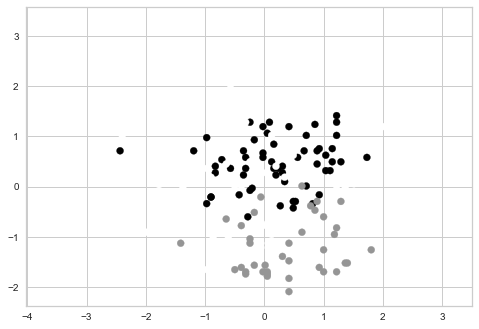

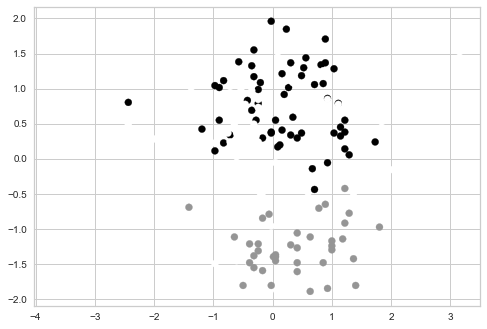

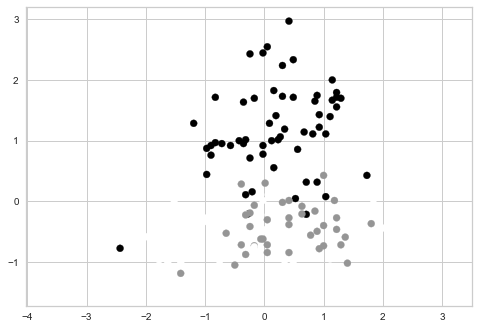

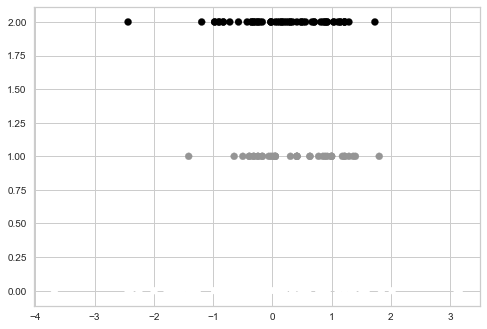

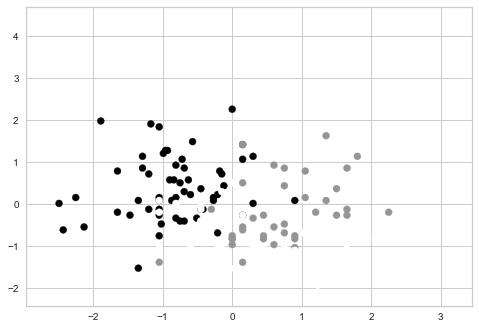

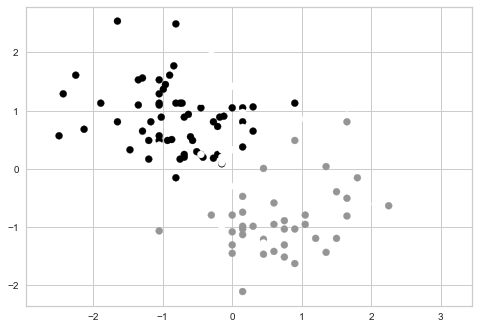

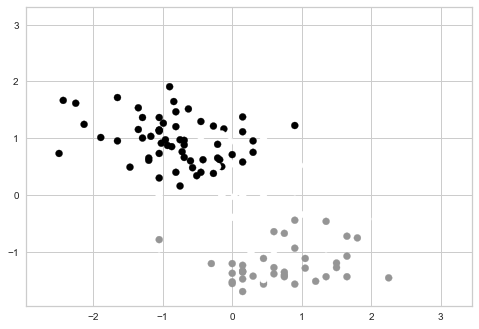

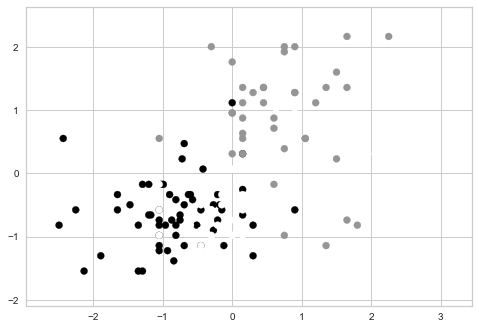

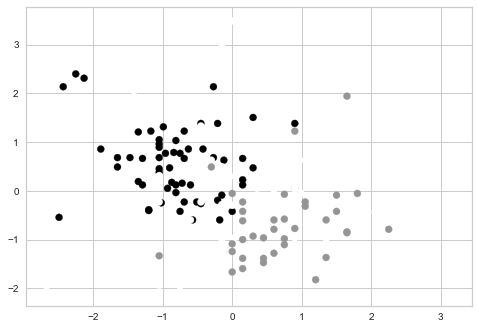

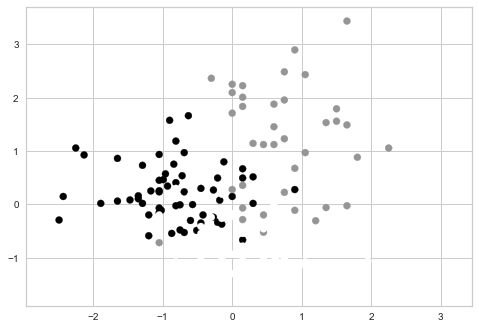

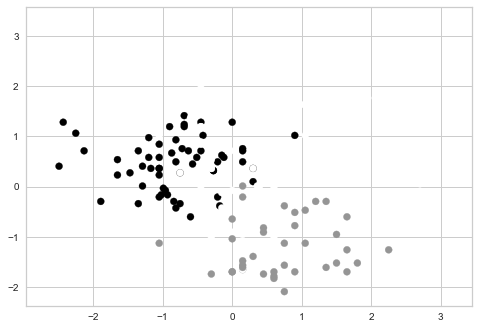

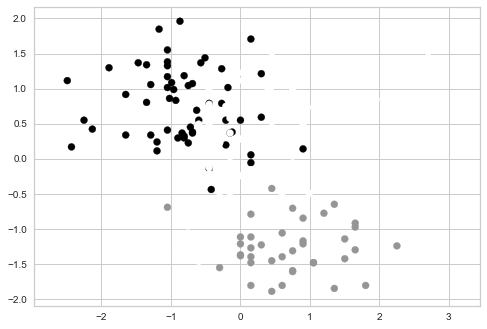

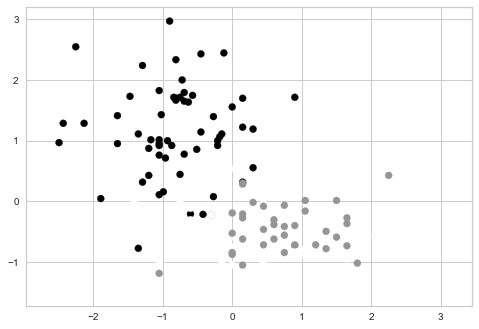

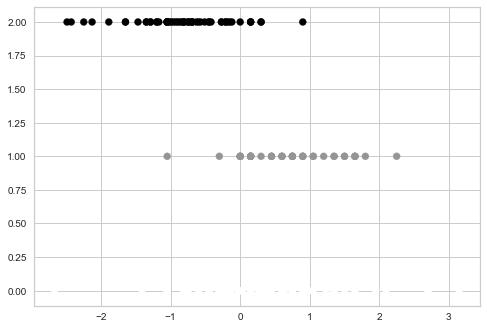

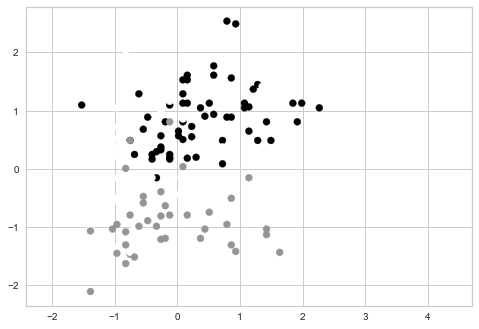

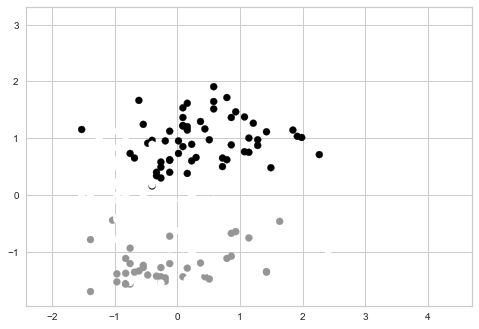

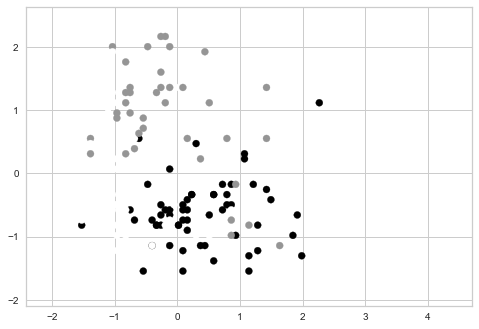

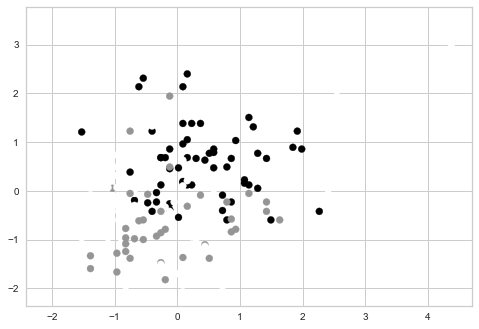

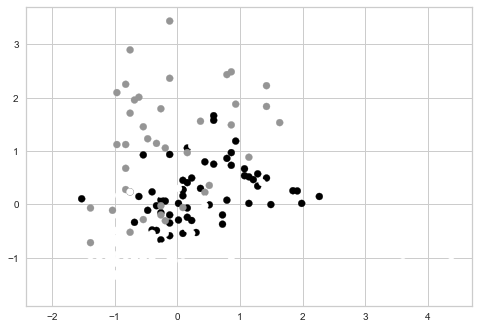

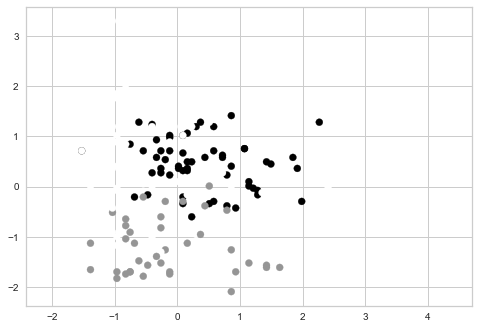

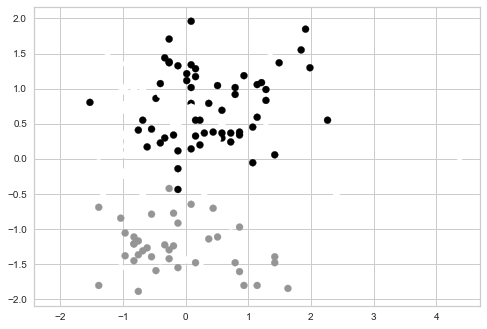

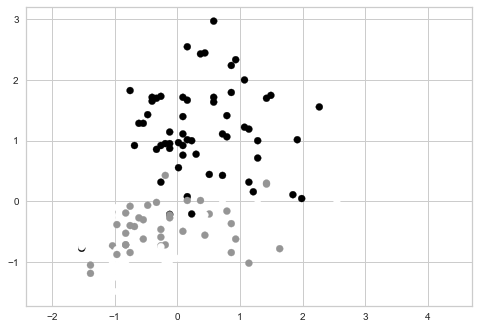

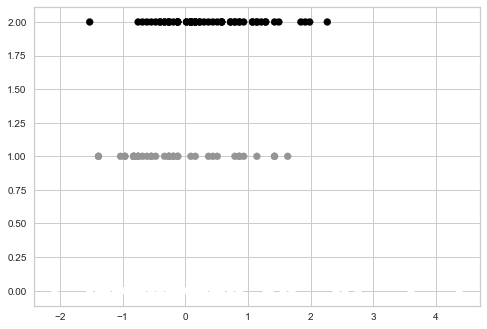

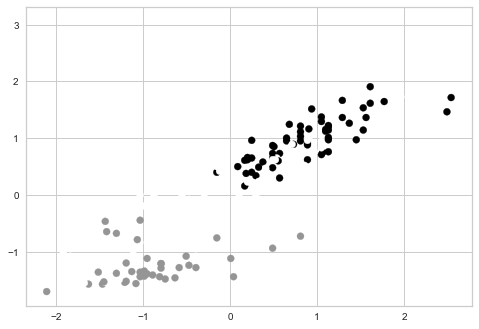

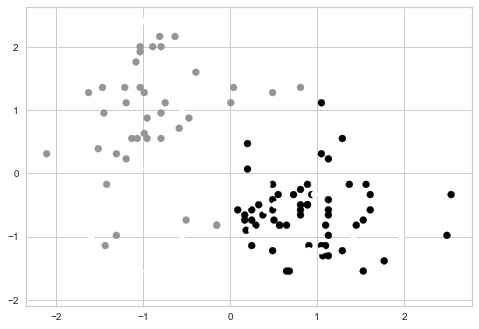

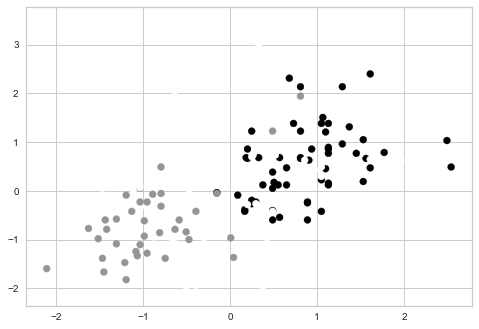

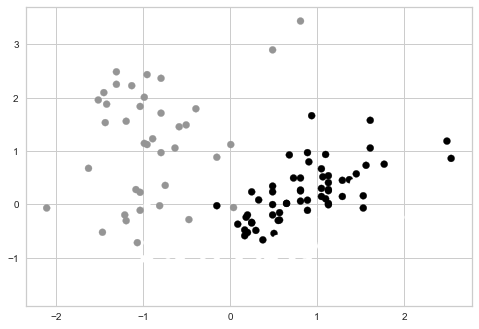

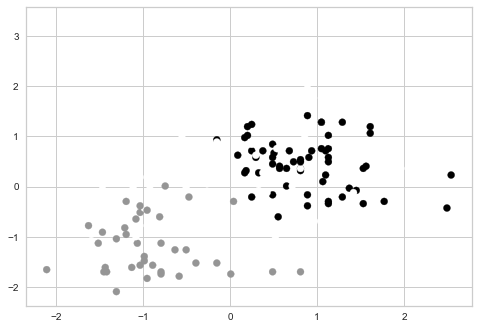

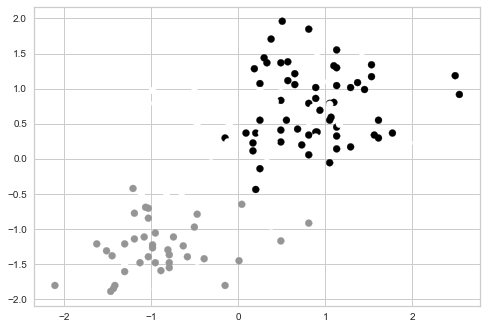

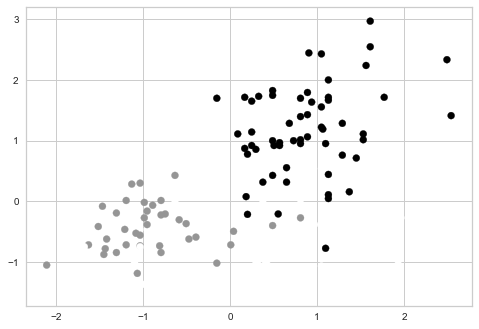

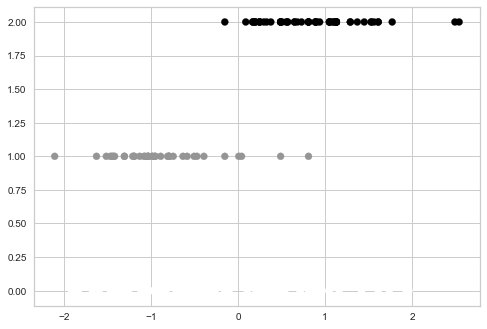

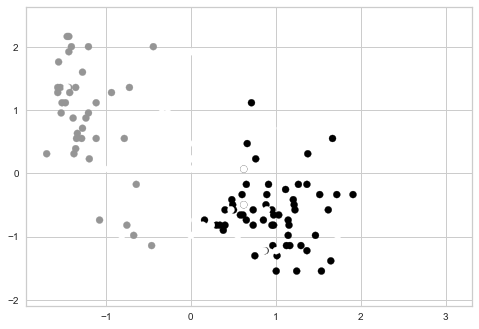

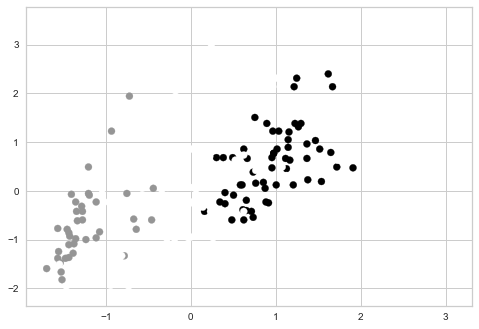

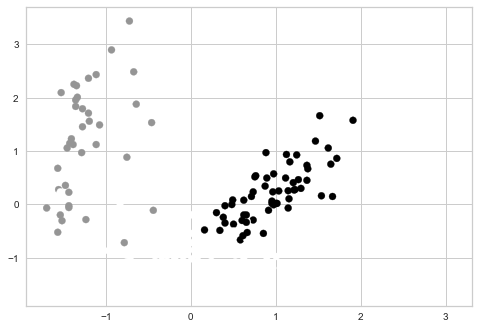

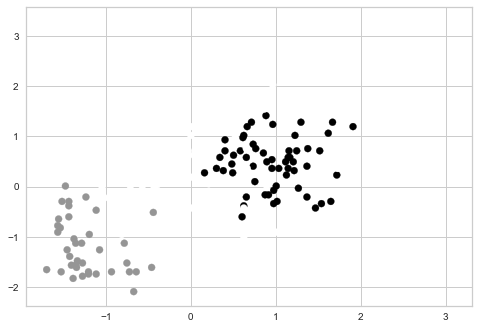

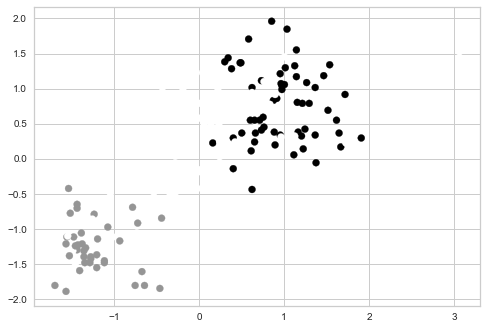

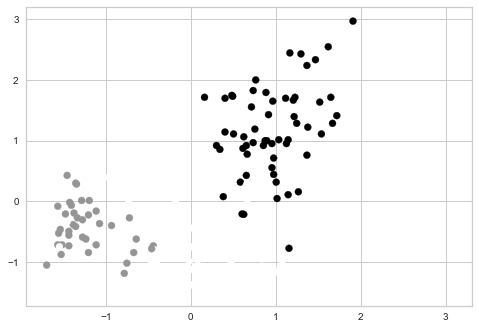

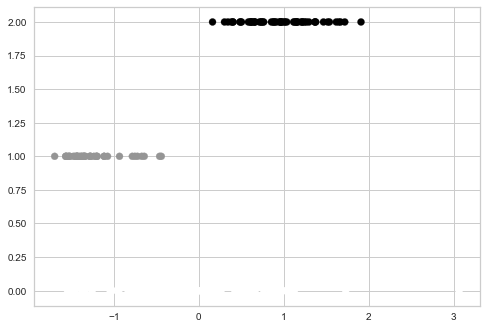

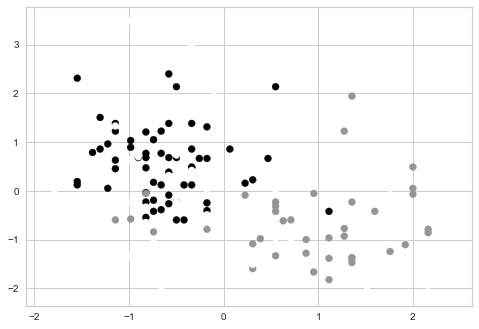

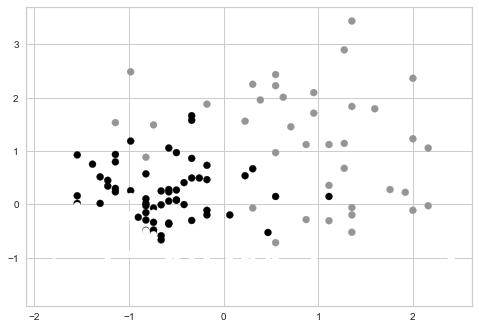

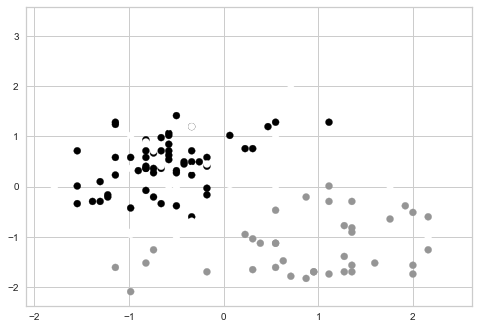

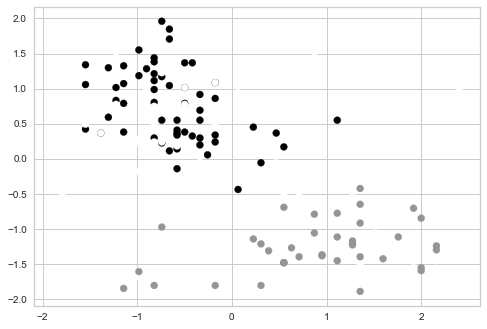

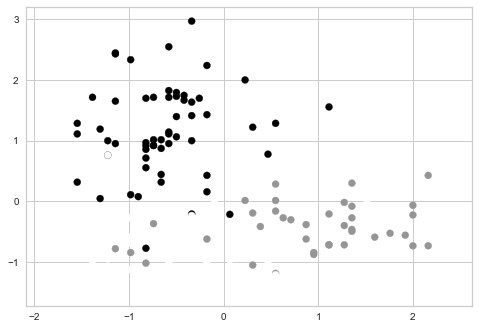

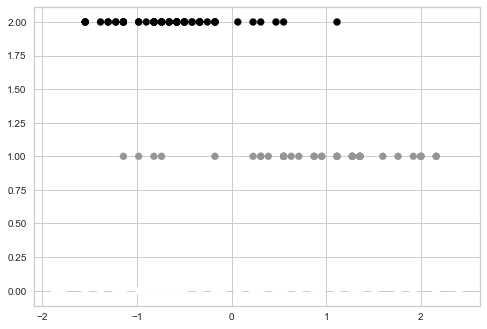

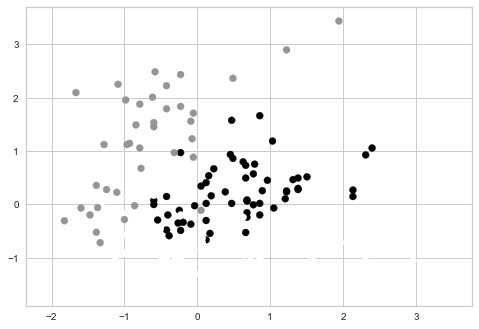

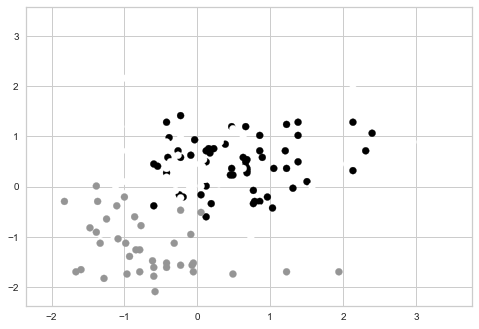

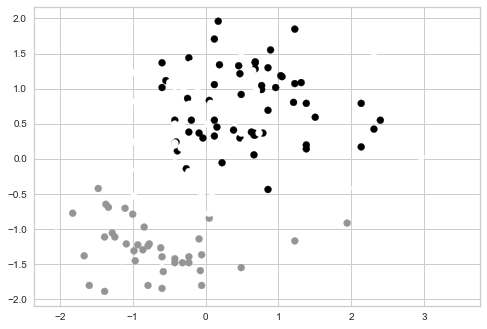

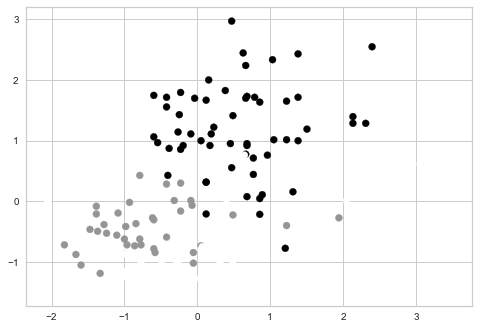

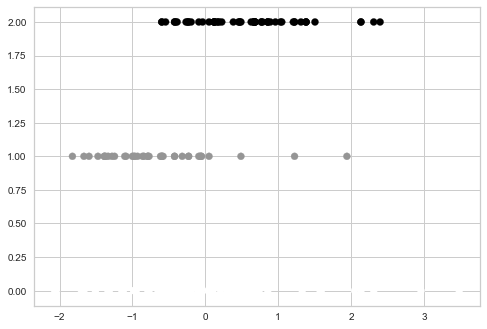

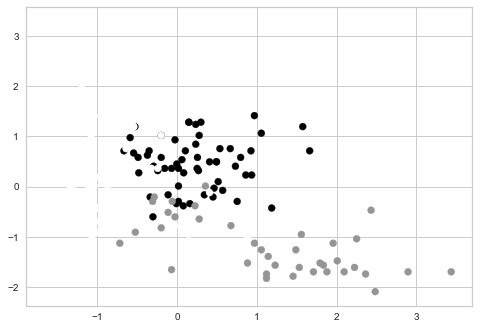

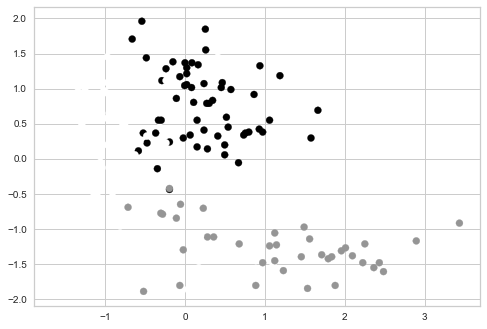

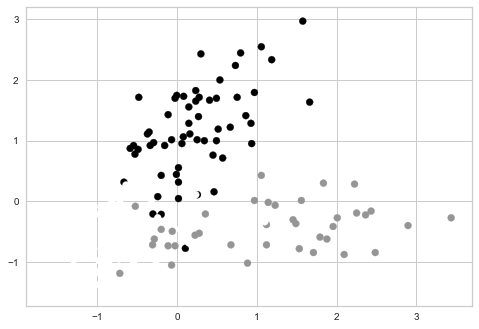

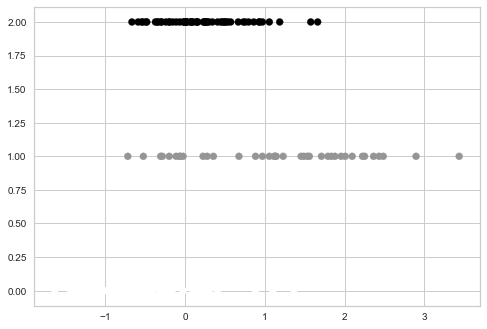

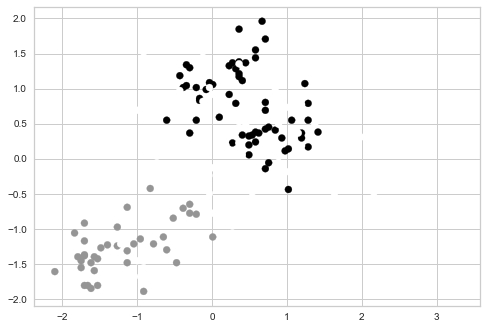

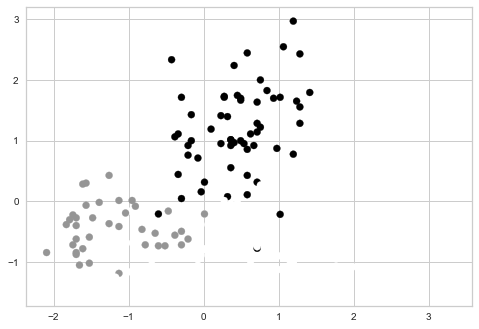

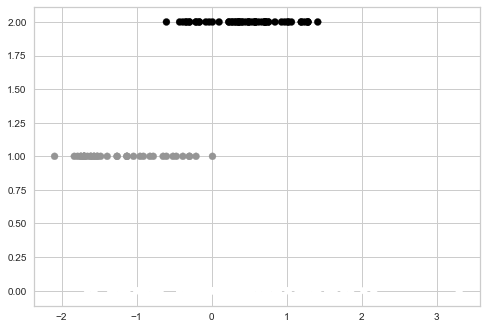

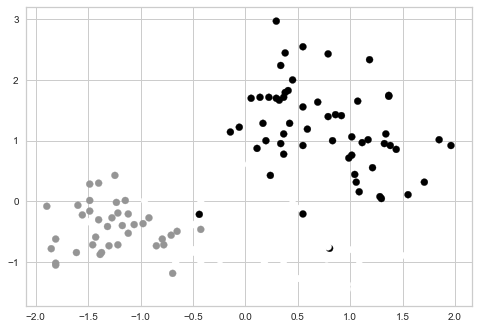

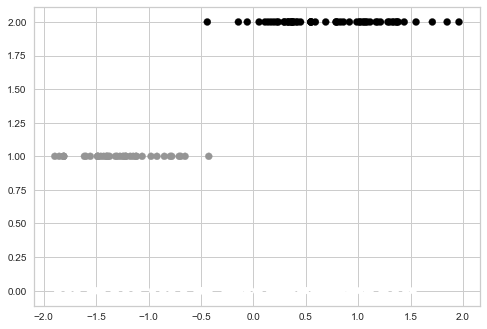

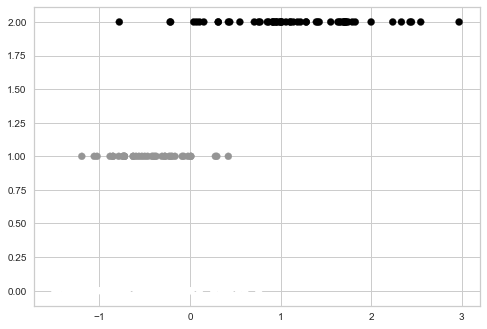

In [173]:
import matplotlib.pyplot as plt 
from itertools import combinations 

model = AC(n_clusters=3)
model.fit(X)
labels = model.labels_

X['labels'] = labels

comb = combinations(X.columns, 2)

def C_model(c):
    for a,b in comb:
        plt.subplots(1, 1)
        plt.scatter(X[a], X[b], c=c)
    

C_model(X.labels)

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [176]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
df_pca = pd.DataFrame(pca.transform(X))

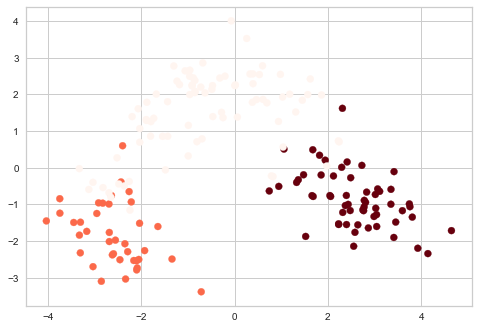

In [177]:
plt.subplots(1, 1)
plt.scatter(df_pca[0],df_pca[1],c=X.labels, cmap='Reds')

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [178]:
pca = PCA(n_components=2)
pca.fit(X)
df_pca = pd.DataFrame(pca.transform(X))

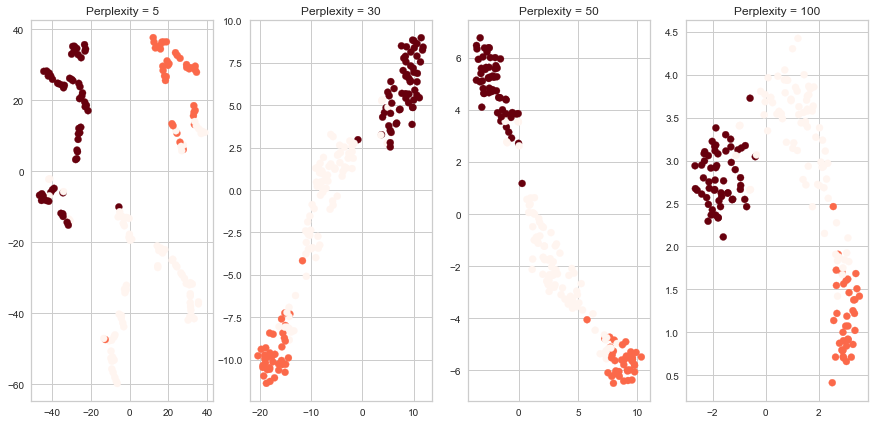

In [179]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(df_pca)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=X.labels, cmap='Reds')
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()

In [180]:
X.labels.value_counts()

0    82
2    58
1    38
Name: labels, dtype: int64

In [181]:
c1 = X[X['labels']==0]
c2 = X[X['labels']==1]
c3 = X[X['labels']==2]

In [182]:
c1.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.0
mean,-0.791333,-0.280800,-0.309562,0.251268,-0.206195,-0.203989,-0.114968,0.024368,-0.090461,-0.698302,0.232483,0.056012,-0.621064,0.0
std,0.700599,0.894308,1.160266,0.939696,1.154168,0.936988,0.807049,1.006519,1.052687,0.580616,0.999659,0.885275,0.534291,0.0
min,-2.434235,-1.432983,-3.679162,-2.671018,-2.088255,-1.914966,-1.545376,-1.868234,-2.069034,-1.634288,-1.655999,-1.866805,-1.493188,0.0
25%,-1.236028,-0.892141,-0.891965,-0.298767,-0.964842,-0.945556,-0.659375,-0.740141,-0.741830,-1.063296,-0.427544,-0.493204,-1.034621,0.0
50%,-0.828391,-0.575715,-0.334525,0.151661,-0.543562,-0.304623,-0.099663,0.065639,-0.229346,-0.868639,0.164747,0.237735,-0.738463,0.0
75%,-0.389872,0.108753,0.177222,0.624610,0.228785,0.420432,0.256745,0.549108,0.471488,-0.487978,0.987373,0.742683,-0.248051,0.0
max,1.073917,3.109192,3.156325,3.154511,4.371372,1.962676,3.062832,2.402403,3.485073,1.363422,3.301694,1.523058,0.758249,0.0


In [183]:
c2.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,0.335034,1.106695,0.380190,0.704817,-0.138911,-0.886944,-1.224899,0.896866,-0.664600,1.161935,-1.196483,-1.265030,-0.437025,1.0
std,0.625935,0.912995,0.708132,0.684137,0.808082,0.575810,0.325543,0.857499,0.765934,1.050532,0.556433,0.363450,0.383505,0.0
min,-0.927212,-0.598156,-1.412851,-1.049479,-1.386122,-2.107246,-1.695971,-1.143031,-1.823742,-0.717240,-2.094732,-1.895054,-1.193845,1.0
25%,-0.179877,0.458842,-0.170035,0.151661,-0.754202,-1.205935,-1.434939,0.549108,-1.210513,0.238740,-1.688904,-1.485445,-0.722540,1.0
50%,0.363640,0.954801,0.414820,0.677160,-0.262708,-0.985614,-1.339562,1.032576,-0.790013,1.186068,-1.326948,-1.287703,-0.443897,1.0
75%,0.752748,1.708838,0.981397,1.165123,0.421872,-0.661142,-1.113670,1.354888,-0.251247,1.936577,-0.789499,-1.075837,-0.201079,1.0
max,1.654492,2.974543,1.803849,2.253656,1.633052,0.808997,-0.441012,2.160669,1.943238,3.435432,0.011190,-0.426113,0.423878,1.0


In [184]:
c3.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0
mean,0.899276,-0.328084,0.188567,-0.817017,0.382528,0.869499,0.965061,-0.622053,0.563321,0.225986,0.455219,0.749624,1.164382,2.0
std,0.610244,0.636954,0.783488,0.680388,0.763557,0.553512,0.401866,0.524429,0.733569,0.523298,0.508674,0.529330,0.748250,0.0
min,-0.778980,-1.190614,-2.436346,-2.490847,-1.526548,-0.152402,0.161368,-1.545922,-0.597284,-0.665332,-0.603037,-0.440238,-0.779861,2.0
25%,0.487166,-0.616110,-0.307110,-1.139565,-0.122282,0.488531,0.653312,-0.881153,0.068508,-0.144085,0.131842,0.343668,0.794075,2.0
50%,0.919509,-0.535320,0.213776,-0.809251,0.193678,0.849056,0.959521,-0.659563,0.646696,0.154389,0.493797,0.739152,1.108544,2.0
75%,1.358028,-0.393938,0.844322,-0.426388,0.860705,1.129464,1.223063,-0.337251,0.944551,0.510177,0.746069,1.155823,1.697675,2.0
max,2.259772,1.529305,1.730742,0.902373,2.264972,2.539515,1.908270,1.113154,2.398780,1.661895,1.415139,1.960915,2.971473,2.0
